In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Datasets for the 5 cities

In [2]:

A_data=pd.read_csv("warangal_hw.csv")
print("The dataset for the required city is:")
A_data

The dataset for the required city is:


,YEAR,MO,DY,T2M,QV2M
0,2016,1,1,23.83,8.48
1,2016,1,2,24.08,8.12
2,2016,1,3,23.62,6.90
3,2016,1,4,23.18,7.02
4,2016,1,5,23.16,7.57
...,...,...,...,...,...
2552,2022,12,27,23.30,15.81
2553,2022,12,28,23.83,15.81
2554,2022,12,29,22.67,13.37
2555,2022,12,30,22.67,11.96


In [3]:
'''Function to predict heat wave
        0-No heat wave
        1-Mild heat wave
        2-Intense heat wave'''

def Heat_wave_pred(df):
    L=[]
    mean=df.mean()
    for i in df:
        if i-mean>=4.5 and i-mean<6.4:
            L.append(1)
        elif i-mean>6.4:
            L.append(2)
        elif i>=45:
            L.append(1)
        elif i>=47:
            L.append(2)
        else:
            L.append(0)
    return L
#A_data["HWP"]=Heat_wave_pred(A_data["T2M"])

In [4]:
#Converting the year month and day columns to datetime data type

L=[]
l=[]
for i in range(2557):
    L.append(str(A_data["DY"][i])+"  "+str(A_data["MO"][i])+"  "+str(A_data["YEAR"][i]))
    l.append(i)
A_data["Date"]=L
A_data["Index"]=l
A_data['Date'] =  A_data["Date"].apply(pd.to_datetime,infer_datetime_format=True)
A_data["Date"]

0      2016-01-01
1      2016-02-01
2      2016-03-01
3      2016-04-01
4      2016-05-01
          ...    
2552   2022-12-27
2553   2022-12-28
2554   2022-12-29
2555   2022-12-30
2556   2022-12-31
Name: Date, Length: 2557, dtype: datetime64[ns]

In [5]:
A_data_test=A_data[["Date","T2M"]]
A_data_test.set_index("Date",inplace=True)
A_data_test

,T2M
Date,
2016-01-01,23.83
2016-02-01,24.08
2016-03-01,23.62
2016-04-01,23.18
2016-05-01,23.16
...,...
2022-12-27,23.30
2022-12-28,23.83
2022-12-29,22.67


# Printing the dataset

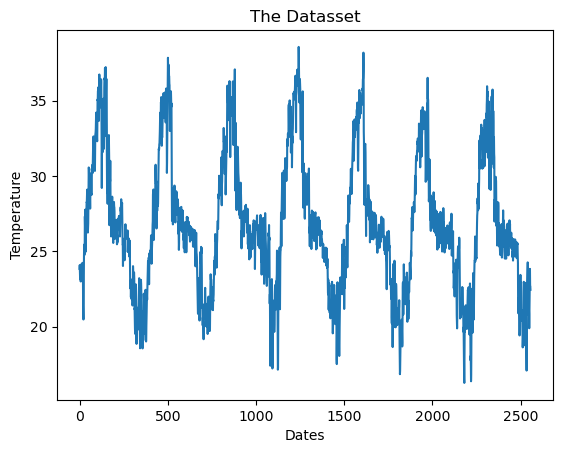

In [6]:
plt.title("The Datasset")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(np.array(A_data["Index"]),np.array(A_data["T2M"]))

# Splitting in test adn training dataset

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
train=A_data_test.iloc[:-30]
test=A_data_test.iloc[-30:]

In [8]:
from statsmodels.tsa.stattools import adfuller
dfa=adfuller(A_data_test)
print("The p-value of the dataset is:",dfa[1])

The p-value of the dataset is: 0.02141605542375046


In [9]:
#pip install pmdarima

In [10]:
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
fit=auto_arima(A_data_test["T2M"],trace=True,suppress_warning=True)
fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6604.180, Time=3.90 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6779.604, Time=0.82 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6746.495, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6734.295, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6777.605, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6612.714, Time=3.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6602.184, Time=2.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6724.958, Time=1.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6685.881, Time=0.56 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6604.180, Time=3.34 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6654.983, Time=0.74 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.53 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=6600.186, Time=0.93 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6722.958, Time=0.58 sec
 ARIMA(2,1,0)(0,0,0)[0]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2557
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -3296.093
Date:                Sat, 04 Mar 2023   AIC                           6600.186
Time:                        18:55:50   BIC                           6623.571
Sample:                             0   HQIC                          6608.666
                               - 2557                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8662      0.032     27.305      0.000       0.804       0.928
ar.L2         -0.2416      0.015    -16.200      0.000      -0.271      -0.212
ma.L1         -0.7748      0.031    -24.866      0.000      -0.836      -0.714
sigma2         0.7719      0.014     56.323      0.000       0.745       0.799
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1236.07
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                            -0.71
Prob(H) (two-sided):                  0.18   Kurtosis:                         6.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The training data is:


,T2M
Date,
2016-01-01,23.83
2016-02-01,24.08
2016-03-01,23.62
2016-04-01,23.18
2016-05-01,23.16
...,...
2022-11-27,18.76
2022-11-28,18.93
2022-11-29,19.53


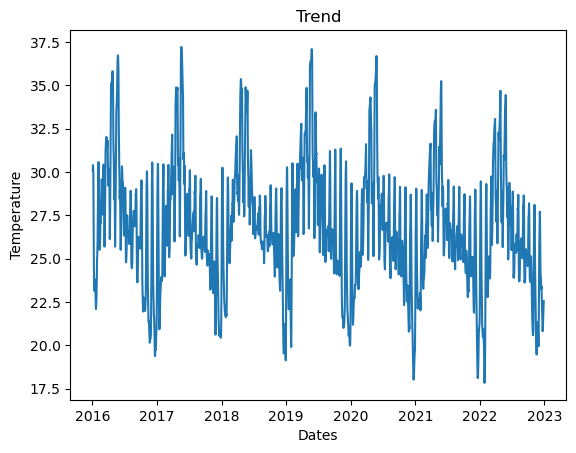

In [11]:
A_data_test.sort_index(inplace=True)
decompose = seasonal_decompose(A_data_test)
trend=decompose.trend
seasonal=decompose.seasonal
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.title("Trend")
plt.plot(trend)
print("The training data is:")
train

In [12]:
from statsmodels.tsa.arima.model import ARIMA 
model =ARIMA(train,order=(2,1,1),seasonal_order=(1,1,1,30))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2527
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -3282.951
Date:                          Sat, 04 Mar 2023   AIC                           6577.902
Time:                                  18:59:33   BIC                           6612.837
Sample:                                       0   HQIC                          6590.586
                                         - 2527                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8500      0.034     25.329      0.000       0.784       0.916
ar.L2         -0.2351      0.015    -15.432      0.000      -0.265      -0.205
ma.L1         -0.7676      0.032    -23.678      0.000      -0.831      -0.704
ar.S.L30       0.0236      0.019      1.214      0.225      -0.014       0.062
ma.S.L30      -0.9995      0.360     -2.778      0.005      -1.705      -0.294
sigma2         0.7714      0.274      2.815      0.005       0.234       1.308
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1095.23
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.68
Prob(H) (two-sided):                  0.33   Kurtosis:                         5.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'Predicted values for the month of December 2022')

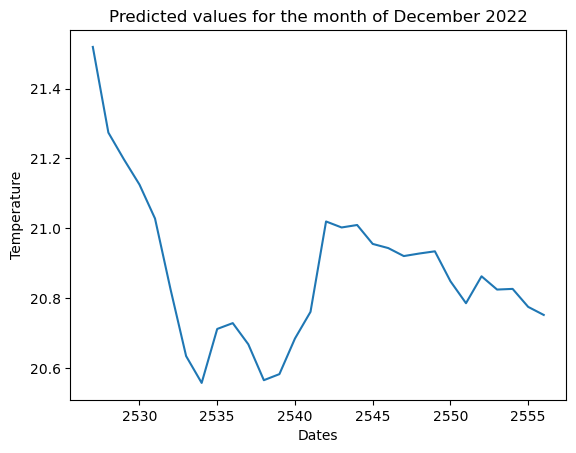

In [13]:
starts=len(train)
ends=len(train)+len(test)-1
pred=model_fit.predict(start=starts,end=ends,typ='levels')
plt.plot(pred)
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.title("Predicted values for the month of December 2022")

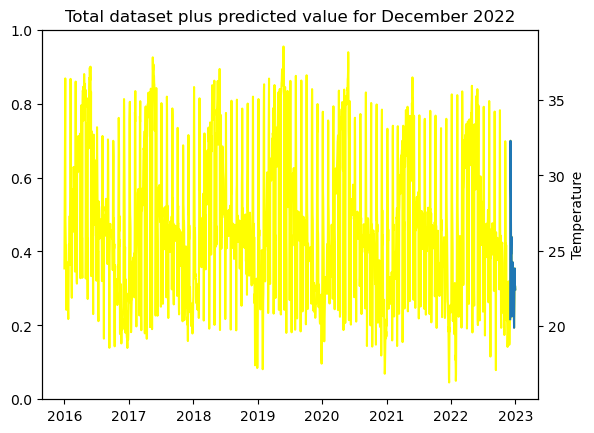

In [14]:
res=pd.DataFrame(pred)
res.columns=["T2M"]
final_data =pd.DataFrame(train)
pred_data=final_data.append(res)
fig,ax1=plt.subplots()
ax2=ax1.twinx()
#curve1=ax1.plot(pred_data,label='predicted Temp',color='black')
curve2=ax2.plot(A_data_test,label="Actual Temp",color='yellow')
plt.plot(A_data_test[-30:])
#plt.plot(pred)
plt.xlabel("Years")
plt.ylabel("Temperature")
plt.title("Total dataset plus predicted value for December 2022")
plt.plot()
plt.show()

# Performance of the model

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
L=[]
for i in pred:
    L.append(i)
l=list(test["T2M"])
rmse=sqrt(mean_squared_error(pred,test["T2M"]))
ame=mean_absolute_error(pred,test["T2M"])
print("Average Temperature         : ",A_data_test['T2M'].mean())
print("Root mean Square value      : ",rmse)
print("Mean absolute Error         : ",ame)

Average Temperature         :  26.853140398905243
Root mean Square value      :  1.9378711779974342
Mean absolute Error         :  1.5688759890020754


# Forecasting for the year 2023

# Predictions for January

In [17]:
#Since Jan has 31 days we use 31 in seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. Jan 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2557
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -5713.538
Date:                          Sat, 04 Mar 2023   AIC                          11439.076
Time:                                  19:39:29   BIC                          11474.080
Sample:                              01-01-2016   HQIC                         11451.777
                                   - 12-31-2022                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6606      0.017     38.584      0.000       0.627       0.694
ar.L2         -0.0613      0.017     -3.569      0.000      -0.095      -0.028
ma.L1         -0.9514      0.007   -142.123      0.000      -0.965      -0.938
ar.S.L31       0.5163      0.016     31.702      0.000       0.484       0.548
ma.S.L31      -0.9999      3.716     -0.269      0.788      -8.284       6.284
sigma2         5.1897     19.250      0.270      0.787     -32.539      42.919
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4708.43
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.19
Prob(H) (two-sided):                  0.14   Kurtosis:                         9.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of Jan 2023 is:",pred_new)

The predicted Temperature values of each day of Jan 2023 is: 2023-01-01    22.943018
2023-01-02    22.053159
2023-01-03    25.817673
2023-01-04    27.985051
2023-01-05    26.481338
2023-01-06    26.344898
2023-01-07    24.380959
2023-01-08    24.826350
2023-01-09    25.066746
2023-01-10    24.868884
2023-01-11    22.146059
2023-01-12    23.417006
2023-01-13    23.697593
2023-01-14    23.899217
2023-01-15    23.948105
2023-01-16    24.020485
2023-01-17    23.473787
2023-01-18    22.589033
2023-01-19    22.193712
2023-01-20    22.602618
2023-01-21    22.308821
2023-01-22    22.346205
2023-01-23    21.865241
2023-01-24    21.429870
2023-01-25    21.900254
2023-01-26    22.636575
2023-01-27    23.496999
2023-01-28    23.705025
2023-01-29    23.099367
2023-01-30    23.019012
2023-01-31    22.919490
Freq: D, Name: predicted_mean, dtype: float64


In [19]:
#Combining the pred Jan2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

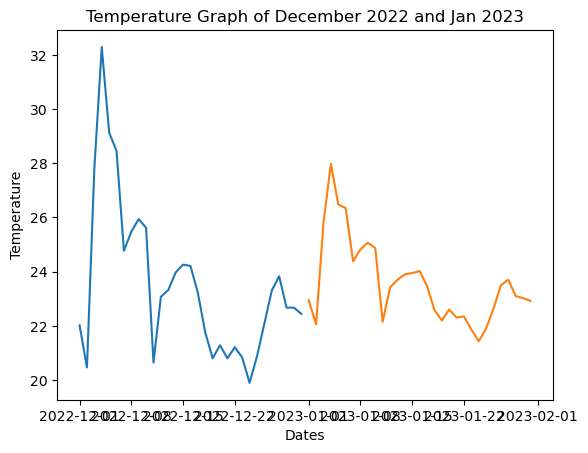

In [20]:
plt.title("Temperature Graph of December 2022 and Jan 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

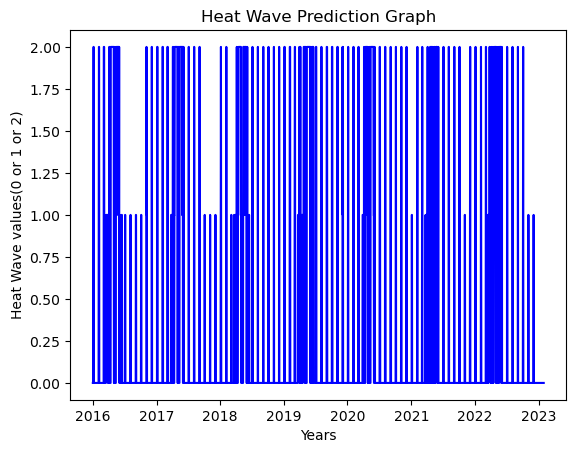

In [21]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [22]:
pred_data_Jan

,T2M,HWP
2016-01-01,23.830000,0
2016-01-02,26.700000,0
2016-01-03,27.830000,0
2016-01-04,32.900000,1
2016-01-05,35.850000,2
...,...,...
2023-01-27,23.496999,0
2023-01-28,23.705025,0
2023-01-29,23.099367,0
2023-01-30,23.019012,0


In [23]:
#Updating the original dataset to the combined data

A_data_test=pred_data
A_data_test.tail()

,T2M
2023-01-27,23.496999
2023-01-28,23.705025
2023-01-29,23.099367
2023-01-30,23.019012
2023-01-31,22.919490


# Predictions for February

In [24]:
#Since Feb has 28 days we use 28 in seasonal order as we need 28 outputs and we need to forecast the next 28 days ie. Feb 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,28))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2588
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 28)   Log Likelihood               -6072.437
Date:                          Sat, 04 Mar 2023   AIC                          12156.875
Time:                                  19:42:09   BIC                          12191.959
Sample:                              01-01-2016   HQIC                         12169.597
                                   - 01-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8709      0.016     53.128      0.000       0.839       0.903
ar.L2         -0.2444      0.019    -12.910      0.000      -0.281      -0.207
ma.L1         -0.9474      0.008   -115.604      0.000      -0.964      -0.931
ar.S.L28      -0.0077      0.019     -0.404      0.686      -0.045       0.029
ma.S.L28      -0.9998      0.696     -1.437      0.151      -2.363       0.364
sigma2         6.4093      4.455      1.439      0.150      -2.322      15.140
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              2814.25
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.50
Prob(H) (two-sided):                  0.11   Kurtosis:                         8.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
pred_new =model_fit.forecast(28)
print("The predicted Temperature values of each day of Feb 2023 are:",pred_new)

The predicted Temperature values of each day of Feb 2023 are: 2023-02-01    23.024495
2023-02-02    22.797741
2023-02-03    22.332524
2023-02-04    22.236260
2023-02-05    22.110635
2023-02-06    21.819998
2023-02-07    21.761892
2023-02-08    21.549490
2023-02-09    21.444173
2023-02-10    21.564644
2023-02-11    21.651310
2023-02-12    21.740485
2023-02-13    21.974030
2023-02-14    22.172863
2023-02-15    22.606570
2023-02-16    22.975381
2023-02-17    22.905782
2023-02-18    23.247275
2023-02-19    23.279591
2023-02-20    23.425301
2023-02-21    23.651065
2023-02-22    23.740148
2023-02-23    23.748081
2023-02-24    23.876212
2023-02-25    24.014883
2023-02-26    23.765013
2023-02-27    23.407796
2023-02-28    23.592464
Freq: D, Name: predicted_mean, dtype: float64


In [26]:
#Combining the pred Feb2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

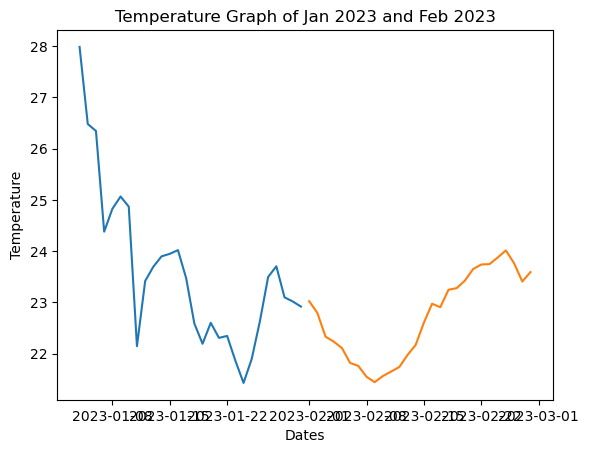

In [27]:
plt.title("Temperature Graph of Jan 2023 and Feb 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-28:])
plt.plot(pred_data[-28:])

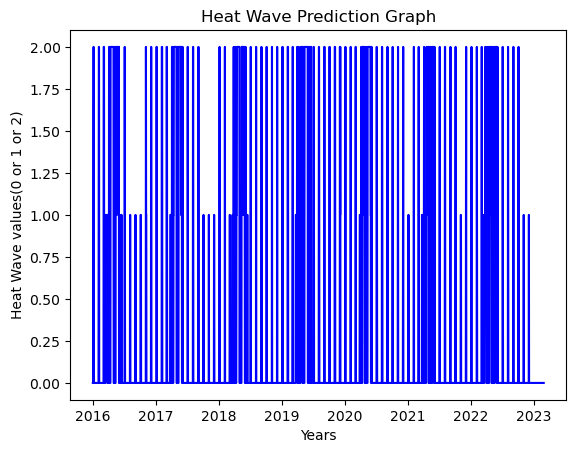

In [28]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [29]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-02-24,23.876212
2023-02-25,24.014883
2023-02-26,23.765013
2023-02-27,23.407796
2023-02-28,23.592464


# Predictions for March

In [30]:
#Since March has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. March 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2616
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -5818.475
Date:                          Sat, 04 Mar 2023   AIC                          11648.951
Time:                                  19:50:18   BIC                          11684.094
Sample:                              01-01-2016   HQIC                         11661.688
                                   - 02-28-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6626      0.017     39.532      0.000       0.630       0.695
ar.L2         -0.0614      0.017     -3.653      0.000      -0.094      -0.028
ma.L1         -0.9517      0.007   -145.476      0.000      -0.965      -0.939
ar.S.L31       0.5141      0.016     32.370      0.000       0.483       0.545
ma.S.L31      -0.9999      4.178     -0.239      0.811      -9.189       7.189
sigma2         5.0794     21.188      0.240      0.811     -36.448      46.607
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5099.44
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.20
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of March 2023 are:",pred_new)

The predicted Temperature values of each day of March 2023 are: 2023-03-01    23.172076
2023-03-02    22.973542
2023-03-03    22.897262
2023-03-04    22.876337
2023-03-05    22.794319
2023-03-06    22.554023
2023-03-07    22.379693
2023-03-08    22.467979
2023-03-09    22.539415
2023-03-10    22.467772
2023-03-11    22.434797
2023-03-12    22.382503
2023-03-13    22.415424
2023-03-14    22.327022
2023-03-15    22.382795
2023-03-16    22.654531
2023-03-17    22.624897
2023-03-18    22.752508
2023-03-19    23.043352
2023-03-20    22.974866
2023-03-21    23.029354
2023-03-22    23.148244
2023-03-23    23.382132
2023-03-24    23.456706
2023-03-25    23.330178
2023-03-26    23.054856
2023-03-27    23.174413
2023-03-28    23.209216
2023-03-29    23.184393
2023-03-30    23.220679
2023-03-31    23.251434
Freq: D, Name: predicted_mean, dtype: float64


In [32]:
#Combining the pred March2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

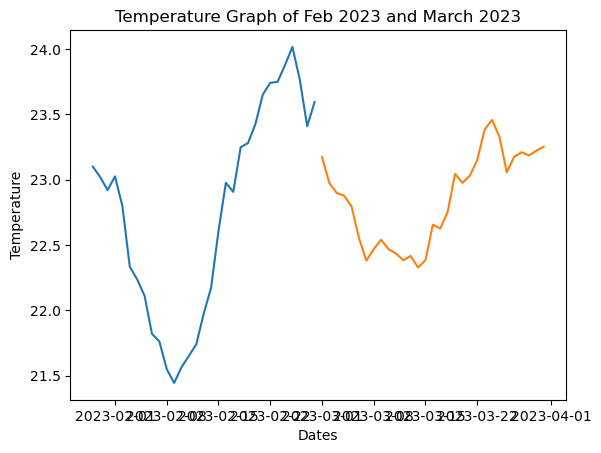

In [33]:
plt.title("Temperature Graph of Feb 2023 and March 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

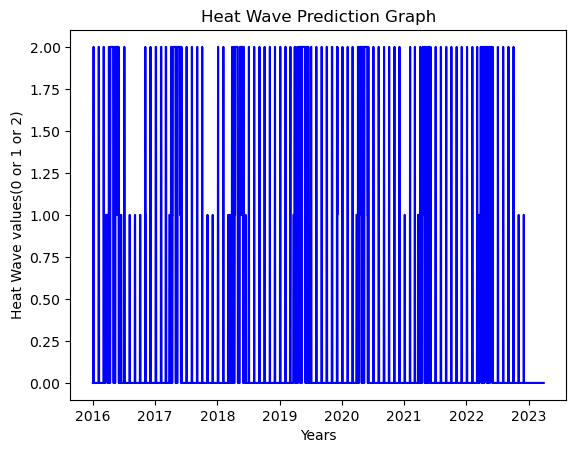

In [34]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [35]:

A_data_test=pred_data
A_data_test.tail()

,T2M
2023-03-27,23.174413
2023-03-28,23.209216
2023-03-29,23.184393
2023-03-30,23.220679
2023-03-31,23.251434





# Predictions of April

In [36]:
#Since April has 30 days we use 30 as the seasonal order as we need 30 outputs and we need to forecast the next 30 days ie. April 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,30))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2647
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -5971.649
Date:                          Sat, 04 Mar 2023   AIC                          11955.298
Time:                                  19:53:15   BIC                          11990.515
Sample:                              01-01-2016   HQIC                         11968.054
                                   - 03-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6623      0.015     42.879      0.000       0.632       0.693
ar.L2         -0.0738      0.020     -3.781      0.000      -0.112      -0.036
ma.L1         -0.9513      0.007   -129.758      0.000      -0.966      -0.937
ar.S.L30       0.4484      0.013     34.367      0.000       0.423       0.474
ma.S.L30      -0.9999      3.102     -0.322      0.747      -7.080       5.080
sigma2         5.4011     16.750      0.322      0.747     -27.428      38.230
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4022.20
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
pred_new =model_fit.forecast(30)
print("The predicted Temperature values of each day of April 2023 are:",pred_new)
    

The predicted Temperature values of each day of April 2023 are: 2023-04-01    23.078839
2023-04-02    23.080223
2023-04-03    23.236488
2023-04-04    23.067421
2023-04-05    22.661700
2023-04-06    22.310047
2023-04-07    22.439074
2023-04-08    22.624009
2023-04-09    22.598902
2023-04-10    22.478030
2023-04-11    22.299483
2023-04-12    22.491684
2023-04-13    22.561815
2023-04-14    22.643296
2023-04-15    22.954838
2023-04-16    22.890038
2023-04-17    22.950460
2023-04-18    23.157235
2023-04-19    23.074647
2023-04-20    22.972352
2023-04-21    22.849173
2023-04-22    22.962194
2023-04-23    23.207315
2023-04-24    23.191032
2023-04-25    22.907520
2023-04-26    22.718540
2023-04-27    22.831374
2023-04-28    23.210940
2023-04-29    23.433987
2023-04-30    23.229594
Freq: D, Name: predicted_mean, dtype: float64


In [38]:
#Combining the pred April2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

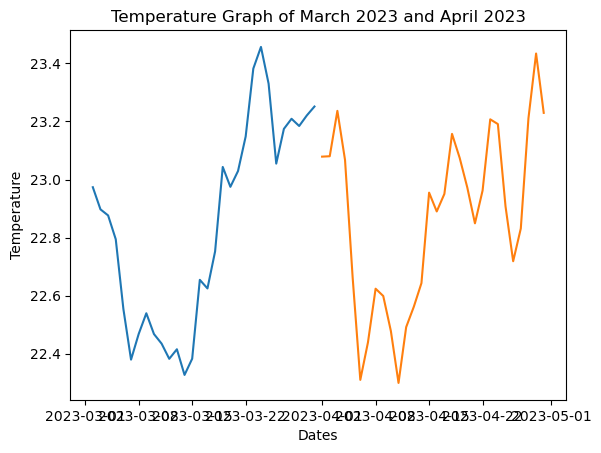

In [39]:
plt.title("Temperature Graph of March 2023 and April 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-30:])
plt.plot(pred_data[-30:])

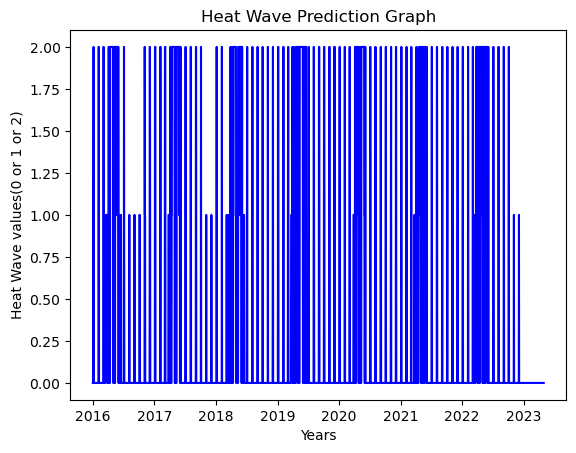

In [40]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')


In [41]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-04-26,22.718540
2023-04-27,22.831374
2023-04-28,23.210940
2023-04-29,23.433987
2023-04-30,23.229594


# Predictions for May

In [42]:
#Since May has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. May 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2677
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -5924.216
Date:                          Sat, 04 Mar 2023   AIC                          11860.432
Time:                                  20:00:06   BIC                          11895.715
Sample:                              01-01-2016   HQIC                         11873.205
                                   - 04-30-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6629      0.016     40.484      0.000       0.631       0.695
ar.L2         -0.0615      0.016     -3.742      0.000      -0.094      -0.029
ma.L1         -0.9518      0.006   -149.371      0.000      -0.964      -0.939
ar.S.L31       0.5139      0.016     33.122      0.000       0.484       0.544
ma.S.L31      -0.9999      2.988     -0.335      0.738      -6.857       4.857
sigma2         4.9634     14.798      0.335      0.737     -24.040      33.967
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5572.04
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of May 2023 are:",pred_new)

The predicted Temperature values of each day of May 2023 are: 2023-05-01    23.114984
2023-05-02    23.002141
2023-05-03    22.916344
2023-05-04    23.013851
2023-05-05    22.873301
2023-05-06    22.707117
2023-05-07    22.529456
2023-05-08    22.478509
2023-05-09    22.728379
2023-05-10    22.934340
2023-05-11    22.830584
2023-05-12    22.812718
2023-05-13    22.915993
2023-05-14    22.924042
2023-05-15    22.835911
2023-05-16    23.009078
2023-05-17    23.123481
2023-05-18    23.024997
2023-05-19    23.038563
2023-05-20    23.093609
2023-05-21    23.007947
2023-05-22    22.823180
2023-05-23    22.983008
2023-05-24    23.267614
2023-05-25    23.217585
2023-05-26    22.898976
2023-05-27    22.524996
2023-05-28    22.636667
2023-05-29    22.799703
2023-05-30    23.019483
2023-05-31    23.129488
Freq: D, Name: predicted_mean, dtype: float64


In [44]:
#Combining the pred May2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

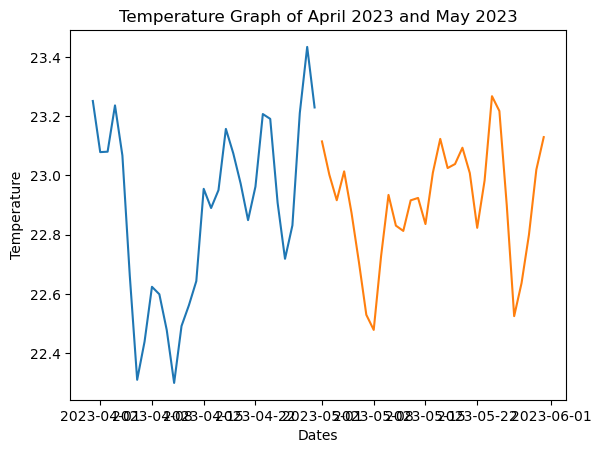

In [45]:
plt.title("Temperature Graph of April 2023 and May 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

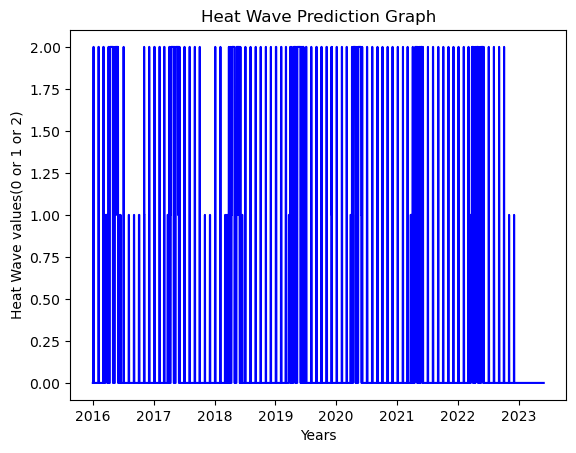

In [46]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')


In [47]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-05-27,22.524996
2023-05-28,22.636667
2023-05-29,22.799703
2023-05-30,23.019483
2023-05-31,23.129488


# Predictions for June

In [48]:
#Since June has 30 days we use 30 as the seasonal order as we need 30 outputs and we need to forecast the next 30 days ie. June 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,30))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2708
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -6079.294
Date:                          Sat, 04 Mar 2023   AIC                          12170.587
Time:                                  20:03:40   BIC                          12205.942
Sample:                              01-01-2016   HQIC                         12183.378
                                   - 05-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6625      0.015     43.886      0.000       0.633       0.692
ar.L2         -0.0739      0.019     -3.874      0.000      -0.111      -0.037
ma.L1         -0.9513      0.007   -132.837      0.000      -0.965      -0.937
ar.S.L30       0.4481      0.013     35.147      0.000       0.423       0.473
ma.S.L30      -0.9998      1.486     -0.673      0.501      -3.912       1.912
sigma2         5.2798      7.840      0.673      0.501     -10.086      20.646
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4397.60
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
pred_new =model_fit.forecast(30)
print("The predicted Temperature values of each day of March 2023 are:",pred_new)

The predicted Temperature values of each day of March 2023 are: 2023-06-01    23.131719
2023-06-02    23.249887
2023-06-03    23.159459
2023-06-04    22.799090
2023-06-05    22.452282
2023-06-06    22.457765
2023-06-07    22.584353
2023-06-08    22.705899
2023-06-09    22.695932
2023-06-10    22.495637
2023-06-11    22.662060
2023-06-12    22.817740
2023-06-13    22.876928
2023-06-14    23.022663
2023-06-15    23.051498
2023-06-16    23.106875
2023-06-17    23.136200
2023-06-18    23.091485
2023-06-19    22.991832
2023-06-20    22.778450
2023-06-21    22.701129
2023-06-22    22.982783
2023-06-23    23.153540
2023-06-24    22.973531
2023-06-25    22.588108
2023-06-26    22.512122
2023-06-27    22.948207
2023-06-28    23.226604
2023-06-29    23.112578
2023-06-30    23.068639
Freq: D, Name: predicted_mean, dtype: float64


In [50]:
#Combining the pred June2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

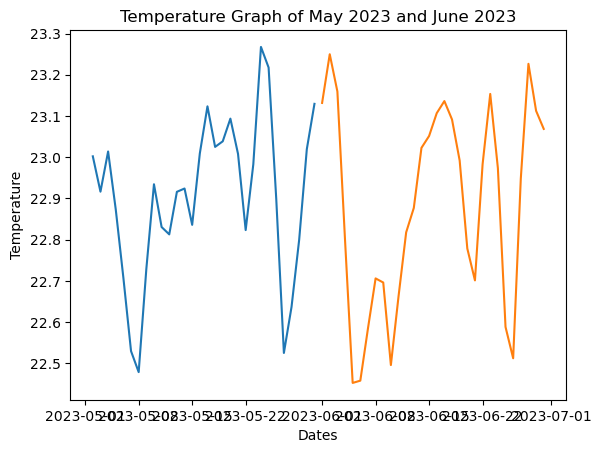

In [51]:
plt.title("Temperature Graph of May 2023 and June 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-30:])
plt.plot(pred_data[-30:])
    

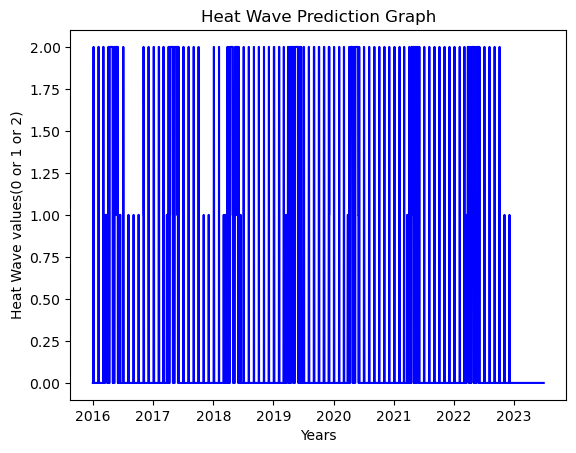

In [52]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')


In [53]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-06-26,22.512122
2023-06-27,22.948207
2023-06-28,23.226604
2023-06-29,23.112578
2023-06-30,23.068639


# Predictions for July

In [54]:
#Since July has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. July 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2738
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -6029.334
Date:                          Sat, 04 Mar 2023   AIC                          12070.668
Time:                                  20:09:32   BIC                          12106.087
Sample:                              01-01-2016   HQIC                         12083.475
                                   - 06-30-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6628      0.016     41.389      0.000       0.631       0.694
ar.L2         -0.0617      0.016     -3.843      0.000      -0.093      -0.030
ma.L1         -0.9516      0.006   -152.220      0.000      -0.964      -0.939
ar.S.L31       0.5135      0.015     33.885      0.000       0.484       0.543
ma.S.L31      -0.9998      1.434     -0.697      0.486      -3.811       1.811
sigma2         4.8523      6.928      0.700      0.484      -8.726      18.430
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6075.14
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of July 2023 are:",pred_new)

The predicted Temperature values of each day of July 2023 are: 2023-07-01    23.226130
2023-07-02    23.104156
2023-07-03    23.126766
2023-07-04    22.983207
2023-07-05    22.804323
2023-07-06    22.566575
2023-07-07    22.610362
2023-07-08    22.679757
2023-07-09    22.627192
2023-07-10    22.773446
2023-07-11    22.883649
2023-07-12    22.930257
2023-07-13    23.085115
2023-07-14    23.119985
2023-07-15    23.168659
2023-07-16    23.055601
2023-07-17    23.096583
2023-07-18    23.257503
2023-07-19    23.106401
2023-07-20    22.962304
2023-07-21    22.946509
2023-07-22    22.873724
2023-07-23    22.902246
2023-07-24    23.091606
2023-07-25    23.152554
2023-07-26    22.909416
2023-07-27    22.700209
2023-07-28    22.657098
2023-07-29    22.855638
2023-07-30    22.763211
2023-07-31    22.842999
Freq: D, Name: predicted_mean, dtype: float64


In [56]:
#Combining the pred July2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

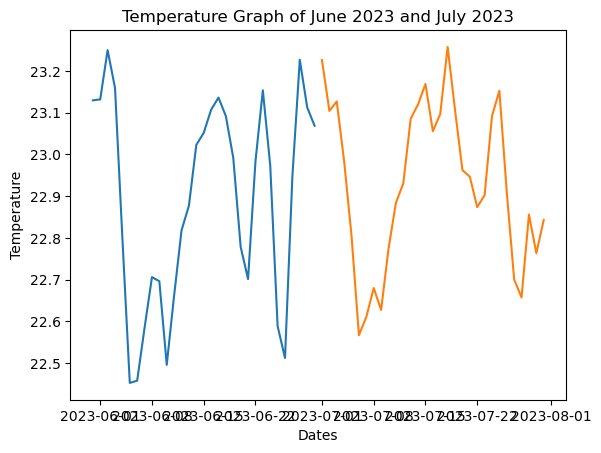

In [57]:
plt.title("Temperature Graph of June 2023 and July 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

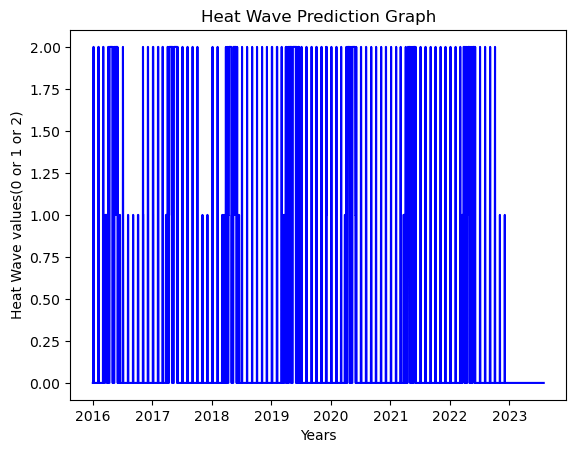

In [58]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [59]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-07-27,22.700209
2023-07-28,22.657098
2023-07-29,22.855638
2023-07-30,22.763211
2023-07-31,22.842999


# Predictions for August

In [60]:
#Since August has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. August 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2769
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -6082.382
Date:                          Sat, 04 Mar 2023   AIC                          12176.764
Time:                                  20:15:05   BIC                          12212.251
Sample:                              01-01-2016   HQIC                         12189.588
                                   - 07-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6629      0.016     41.878      0.000       0.632       0.694
ar.L2         -0.0616      0.016     -3.879      0.000      -0.093      -0.030
ma.L1         -0.9518      0.006   -154.422      0.000      -0.964      -0.940
ar.S.L31       0.5135      0.015     34.268      0.000       0.484       0.543
ma.S.L31      -0.9998      1.422     -0.703      0.482      -3.787       1.787
sigma2         4.7974      6.791      0.706      0.480      -8.513      18.107
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6340.68
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of March 2023 are:",pred_new)

The predicted Temperature values of each day of March 2023 are: 2023-08-01    23.137860
2023-08-02    23.010975
2023-08-03    23.016555
2023-08-04    22.863315
2023-08-05    22.787336
2023-08-06    22.610940
2023-08-07    22.677339
2023-08-08    22.718978
2023-08-09    22.577879
2023-08-10    22.804861
2023-08-11    23.074814
2023-08-12    23.060033
2023-08-13    23.214552
2023-08-14    23.236975
2023-08-15    23.235820
2023-08-16    23.049895
2023-08-17    23.083489
2023-08-18    23.312003
2023-08-19    23.106260
2023-08-20    22.939338
2023-08-21    23.025025
2023-08-22    22.954573
2023-08-23    22.853079
2023-08-24    23.051993
2023-08-25    23.236691
2023-08-26    23.066628
2023-08-27    22.788996
2023-08-28    22.499778
2023-08-29    22.657304
2023-08-30    22.575971
2023-08-31    22.719308
Freq: D, Name: predicted_mean, dtype: float64


In [62]:
#Combining the pred August2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

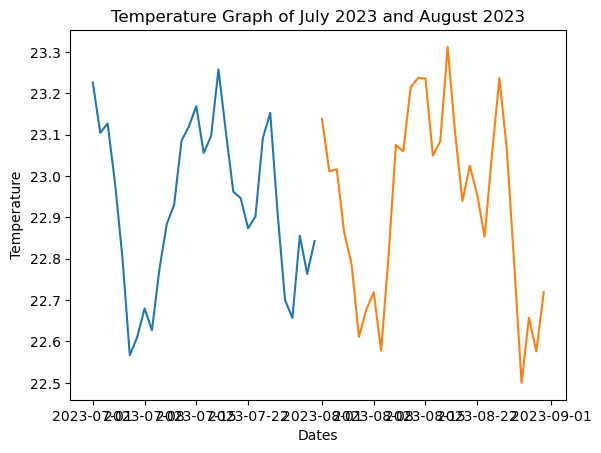

In [63]:
plt.title("Temperature Graph of July 2023 and August 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

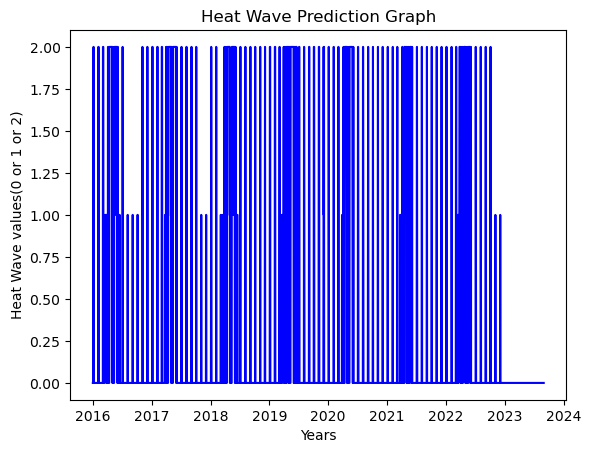

In [64]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [65]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-08-27,22.788996
2023-08-28,22.499778
2023-08-29,22.657304
2023-08-30,22.575971
2023-08-31,22.719308


# Predictions for September

In [66]:
#Since Saptember has 30 days we use 30 as the seasonal order as we need 30 outputs and we need to forecast the next 30 days ie. September 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,30))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2800
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -6240.379
Date:                          Sat, 04 Mar 2023   AIC                          12492.758
Time:                                  20:18:46   BIC                          12528.315
Sample:                              01-01-2016   HQIC                         12505.600
                                   - 08-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6628      0.015     45.421      0.000       0.634       0.691
ar.L2         -0.0741      0.018     -4.017      0.000      -0.110      -0.038
ma.L1         -0.9513      0.007   -137.616      0.000      -0.965      -0.938
ar.S.L30       0.4478      0.012     36.337      0.000       0.424       0.472
ma.S.L30      -0.9999      1.846     -0.542      0.588      -4.618       2.618
sigma2         5.1047      9.418      0.542      0.588     -13.354      23.564
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5004.06
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                            -0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
pred_new =model_fit.forecast(30)
print("The predicted Temperature values of each day of March 2023 are:",pred_new)

The predicted Temperature values of each day of March 2023 are: 2023-09-01    22.748696
2023-09-02    22.616213
2023-09-03    22.366596
2023-09-04    22.459727
2023-09-05    22.548950
2023-09-06    22.601119
2023-09-07    22.526298
2023-09-08    22.316170
2023-09-09    22.592694
2023-09-10    22.824037
2023-09-11    22.872823
2023-09-12    23.124852
2023-09-13    23.087638
2023-09-14    23.090272
2023-09-15    23.077136
2023-09-16    23.043937
2023-09-17    23.026496
2023-09-18    22.760965
2023-09-19    22.690104
2023-09-20    22.933355
2023-09-21    22.942749
2023-09-22    22.743760
2023-09-23    22.599334
2023-09-24    22.772645
2023-09-25    23.069668
2023-09-26    23.142065
2023-09-27    22.803059
2023-09-28    22.783570
2023-09-29    22.803230
2023-09-30    23.042313
Freq: D, Name: predicted_mean, dtype: float64


In [68]:
#Combining the pred September2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

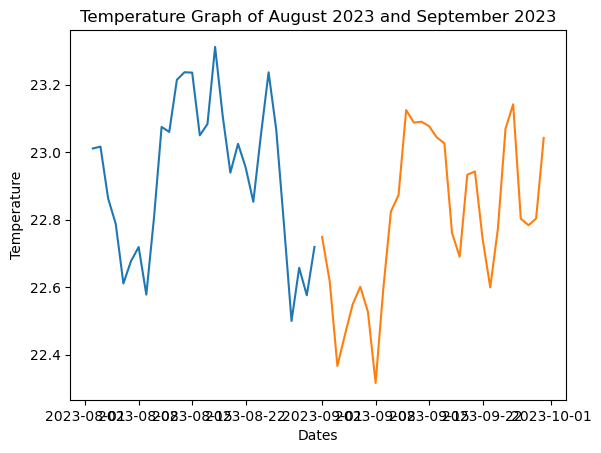

In [69]:
plt.title("Temperature Graph of August 2023 and September 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")

plt.plot(A_data_test[-30:])
plt.plot(pred_data[-30:])

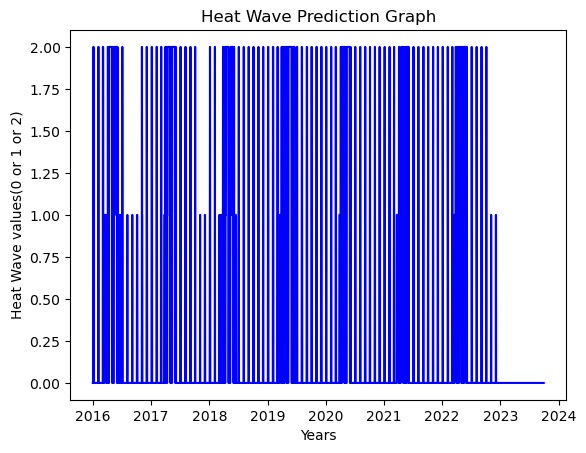

In [70]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [71]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-09-26,23.142065
2023-09-27,22.803059
2023-09-28,22.783570
2023-09-29,22.803230
2023-09-30,23.042313


# Prediction for October

In [72]:
#Since October has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. October 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2830
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -6186.408
Date:                          Sat, 04 Mar 2023   AIC                          12384.815
Time:                                  20:25:41   BIC                          12420.435
Sample:                              01-01-2016   HQIC                         12397.673
                                   - 09-30-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6630      0.015     42.813      0.000       0.633       0.693
ar.L2         -0.0617      0.016     -3.974      0.000      -0.092      -0.031
ma.L1         -0.9517      0.006   -157.757      0.000      -0.964      -0.940
ar.S.L31       0.5132      0.015     35.027      0.000       0.484       0.542
ma.S.L31      -0.9999      3.997     -0.250      0.802      -8.834       6.834
sigma2         4.6924     18.725      0.251      0.802     -32.007      41.392
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6887.55
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of October 2023 are:",pred_new)

The predicted Temperature values of each day of October 2023 are: 2023-10-01    23.005330
2023-10-02    23.070327
2023-10-03    22.844672
2023-10-04    22.655901
2023-10-05    22.598116
2023-10-06    22.645170
2023-10-07    22.610986
2023-10-08    22.610090
2023-10-09    22.503072
2023-10-10    22.534318
2023-10-11    22.803814
2023-10-12    23.038660
2023-10-13    23.132218
2023-10-14    23.185981
2023-10-15    23.191639
2023-10-16    23.158831
2023-10-17    23.015854
2023-10-18    23.018935
2023-10-19    23.022968
2023-10-20    22.860117
2023-10-21    22.896482
2023-10-22    22.993765
2023-10-23    22.857173
2023-10-24    22.667081
2023-10-25    22.857436
2023-10-26    23.163853
2023-10-27    23.157915
2023-10-28    22.813343
2023-10-29    22.540355
2023-10-30    22.604822
2023-10-31    22.696968
Freq: D, Name: predicted_mean, dtype: float64


In [74]:
#Combining the pred October2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

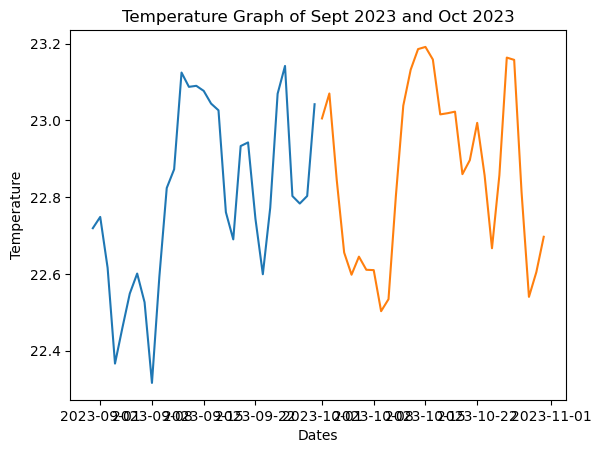

In [75]:
plt.title("Temperature Graph of Sept 2023 and Oct 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

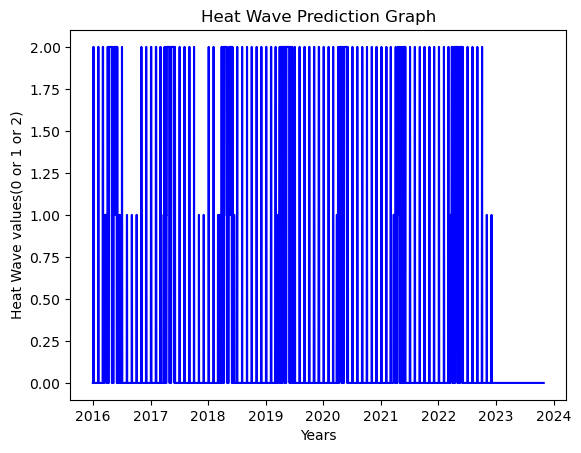

In [76]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [77]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-10-27,23.157915
2023-10-28,22.813343
2023-10-29,22.540355
2023-10-30,22.604822
2023-10-31,22.696968


# Prediction for November

In [78]:
#Since November has 30 days we use 30 as the seasonal order as we need 30 outputs and we need to forecast the next 30 days ie. Nomvember 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,30))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2861
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -6346.276
Date:                          Sat, 04 Mar 2023   AIC                          12704.553
Time:                                  20:28:02   BIC                          12740.241
Sample:                              01-01-2016   HQIC                         12717.428
                                   - 10-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6629      0.014     46.433      0.000       0.635       0.691
ar.L2         -0.0743      0.018     -4.115      0.000      -0.110      -0.039
ma.L1         -0.9513      0.007   -140.644      0.000      -0.965      -0.938
ar.S.L30       0.4475      0.012     37.121      0.000       0.424       0.471
ma.S.L30      -0.9999      1.806     -0.554      0.580      -4.539       2.540
sigma2         4.9951      9.016      0.554      0.580     -12.677      22.667
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5438.07
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                            -0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
pred_new =model_fit.forecast(30)
print("The predicted Temperature values of each day of November 2023 are:",pred_new)

The predicted Temperature values of each day of November 2023 are: 2023-11-01    22.611012
2023-11-02    22.339319
2023-11-03    22.383490
2023-11-04    22.525846
2023-11-05    22.570748
2023-11-06    22.463613
2023-11-07    22.319047
2023-11-08    22.442132
2023-11-09    22.564842
2023-11-10    22.742928
2023-11-11    23.030355
2023-11-12    23.026588
2023-11-13    23.054314
2023-11-14    23.126388
2023-11-15    23.063748
2023-11-16    22.879778
2023-11-17    22.710726
2023-11-18    22.716746
2023-11-19    22.843928
2023-11-20    22.901071
2023-11-21    22.794450
2023-11-22    22.501359
2023-11-23    22.503251
2023-11-24    22.958550
2023-11-25    23.293275
2023-11-26    23.084699
2023-11-27    22.837919
2023-11-28    22.768408
2023-11-29    22.970019
2023-11-30    22.898021
Freq: D, Name: predicted_mean, dtype: float64


In [80]:
#Combining the pred November2023 data with the original dataset


res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

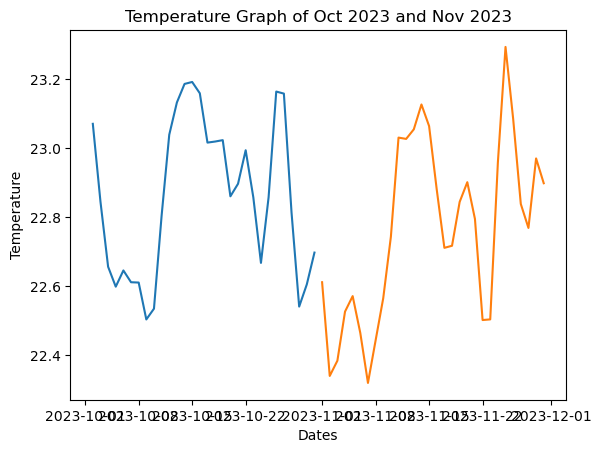

In [81]:

plt.title("Temperature Graph of Oct 2023 and Nov 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-30:])
plt.plot(pred_data[-30:])

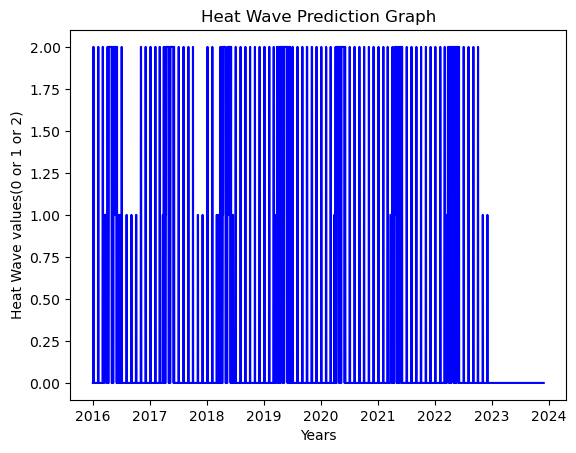

In [82]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [83]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-11-26,23.084699
2023-11-27,22.837919
2023-11-28,22.768408
2023-11-29,22.970019
2023-11-30,22.898021


# Prediction for December

In [84]:
#Since December has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. December 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2891
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -6289.798
Date:                          Sat, 04 Mar 2023   AIC                          12591.595
Time:                                  20:30:45   BIC                          12627.344
Sample:                              01-01-2016   HQIC                         12604.486
                                   - 11-30-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6631      0.015     43.736      0.000       0.633       0.693
ar.L2         -0.0619      0.015     -4.067      0.000      -0.092      -0.032
ma.L1         -0.9517      0.006   -161.201      0.000      -0.963      -0.940
ar.S.L31       0.5129      0.014     35.778      0.000       0.485       0.541
ma.S.L31      -0.9999      2.099     -0.476      0.634      -5.113       3.114
sigma2         4.5938      9.612      0.478      0.633     -14.246      23.434
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7460.99
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of December 2023 are:",pred_new)

The predicted Temperature values of each day of December 2023 are: 2023-12-01    22.737642
2023-12-02    22.684464
2023-12-03    22.688317
2023-12-04    22.614646
2023-12-05    22.662625
2023-12-06    22.599896
2023-12-07    22.554731
2023-12-08    22.424358
2023-12-09    22.528926
2023-12-10    22.596202
2023-12-11    22.580612
2023-12-12    22.879381
2023-12-13    23.084152
2023-12-14    23.062897
2023-12-15    23.172553
2023-12-16    23.144036
2023-12-17    23.022126
2023-12-18    22.809730
2023-12-19    22.824782
2023-12-20    23.030239
2023-12-21    22.935807
2023-12-22    22.792224
2023-12-23    22.729818
2023-12-24    22.697442
2023-12-25    22.821881
2023-12-26    23.096444
2023-12-27    23.138095
2023-12-28    22.966299
2023-12-29    22.762842
2023-12-30    22.609471
2023-12-31    22.625295
Freq: D, Name: predicted_mean, dtype: float64


In [86]:
#Combining the pred December2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

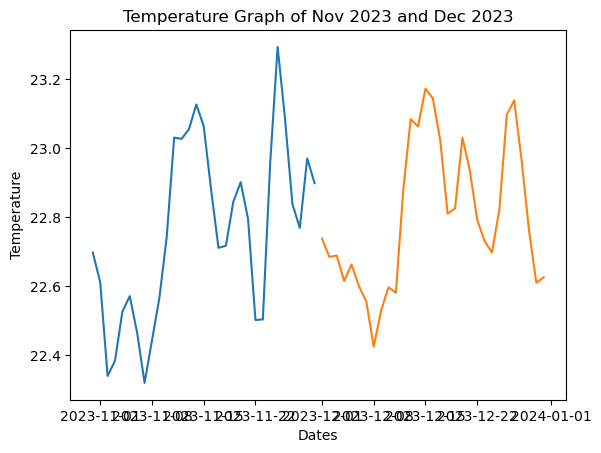

In [87]:
plt.title("Temperature Graph of Nov 2023 and Dec 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

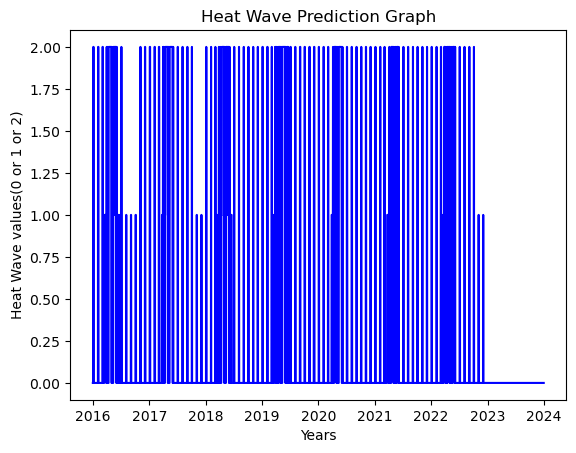

In [88]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [89]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-12-27,23.138095
2023-12-28,22.966299
2023-12-29,22.762842
2023-12-30,22.609471
2023-12-31,22.625295


In [90]:
print("The Average Mean Average Error across all 5 cities is:",1.7294)
print("The model fits the city of Khammam the best a we got the least AME value of",1.44896492)

The Average Mean Average Error across all 5 cities is: 1.7294
The model fits the city of Khammam the best a we got the least AME value of 1.44896492
